In [1]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for empath: filename=empath-0.89-cp37-none-any.whl size=57824 sha256=3ddfdcf9f8fe2daa2b81488d48b428d7ccc805c883fd0c60718d3cdaba985cc2
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d virenkathiriya/totaldata

import zipfile
with zipfile.ZipFile('./totaldata.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

Saving kaggle.json to kaggle.json
 65% 9.00M/13.7M [00:00<00:00, 44.3MB/s]
100% 13.7M/13.7M [00:00<00:00, 45.8MB/s]


In [7]:
df = pd.read_csv('NewsDataSet.csv') 

,text,Category
0,philippine president rodrigo duterte warned th...,0
1,pope francis recently canceled some engagement...,0
2,"By now, the whole world knows that the investi...",0
3,Donald Trump s Muslim ban is proving to be a l...,0
4,WASHINGTON (Reuters) - The U.S. attorney’s off...,1
...,...,...
13697,"If Republicans listen to this sage advice, Don...",0
13698,"On Tuesday, Donald Trump announced the identit...",0
13699,You are using an older browser version. Please...,0
13700,NEW YORK (Reuters) - Puerto Rico’s federal ove...,1


In [9]:
df.at[1, 'text'];

In [ ]:
# Convert to lowercase
def text_lowercase(text): 
	return text.lower() 
  
# convert number into words 
def convert_number(text): 
    # split string into list of words 
    temp_str = text.split() 
    # initialise empty list 
    new_string = [] 
  
    for word in temp_str: 
        # if word is a digit, convert the digit 
        # to numbers and append into the new_string list 
        if word.isdigit(): 
            temp = p.number_to_words(word) 
            new_string.append(temp) 
  
        # append the word as it is 
        else: 
            new_string.append(word) 
  
    # join the words of new_string to form a string 
    temp_str = ' '.join(new_string) 
    return temp_str 

# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 
  
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)

# stem words in the list of tokenised words 
def stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)

# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas)

def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

In [ ]:
df = df.dropna()
df['text']=df['text'].apply(text_lowercase)
df['text']=df['text'].apply(convert_number)
df['text']=df['text'].apply(remove_punctuation)
df['text']=df['text'].apply(remove_whitespace)
df['text']=df['text'].apply(remove_stopwords)
df['text']=df['text'].apply(stem_words)
df['text']=df['text'].apply(lemmatize_word)

df.head()

,text,Category
0,philippin presid rodrigo dutert warn peopl flo...,0
1,pope franci recent cancel engag see cough snee...,0
2,whole world know investig donald trump campaig...,0
3,donald trump muslim ban prove lot difficult lo...,0
4,washington reuter us attorney ’ offic manhatta...,1


In [ ]:
def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

df['empath_features'] = df['text'].apply(empath_feature_calc)

In [ ]:
text_analysis=df['empath_features'].iloc[1]
print(text_analysis)
print(df.Category.shape)
print(df.shape)
print(df.empath_features)
df = df.reset_index(drop=True)

{'help': 0.013333333333333334, 'office': 0.0, 'dance': 0.0, 'money': 0.0, 'wedding': 0.013333333333333334, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 0.006666666666666667, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.006666666666666667, 'attractive': 0.0, 'masculine': 0.006666666666666667, 'prison': 0.006666666666666667, 'health': 0.0, 'pride': 0.0, 'dispute': 0.006666666666666667, 'nervousness': 0.0, 'government': 0.006666666666666667, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.03333333333333333, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.006666666666666667, 'morning': 0.0, 'banking': 0.0, 'social_media': 0.03333333333333333, 'exercise': 0.0, 'night': 0.0, 'kill': 0.006666666666666667, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 

In [ ]:
newDF = pd.DataFrame(columns = list(df.empath_features[0].keys()))
print(newDF.head())
exclude_idx = []
for i in range(df.shape[0]):
    dict_new_dataframe = df.empath_features[i]
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF = newDF.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

# print(df.shape)
# print(df.Category.shape)
# print(newDF.shape) # 194 categories converted into attributes for each row present in original dataset..

Empty DataFrame
Columns: [help, office, dance, money, wedding, domestic_work, sleep, medical_emergency, cold, hate, cheerfulness, aggression, occupation, envy, anticipation, family, vacation, crime, attractive, masculine, prison, health, pride, dispute, nervousness, government, weakness, horror, swearing_terms, leisure, suffering, royalty, wealthy, tourism, furniture, school, magic, beach, journalism, morning, banking, social_media, exercise, night, kill, blue_collar_job, art, ridicule, play, computer, college, optimism, stealing, real_estate, home, divine, sexual, fear, irritability, superhero, business, driving, pet, childish, cooking, exasperation, religion, hipster, internet, surprise, reading, worship, leader, independence, movement, body, noise, eating, medieval, zest, confusion, water, sports, death, healing, legend, heroic, celebration, restaurant, violence, programming, dominant_heirarchical, military, neglect, swimming, exotic, love, hiking, communication, hearing, ...]
Index

In [ ]:
newDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0144928,0,0,0,0.00724638,0,0,0,0,0.00724638,0,0.0217391,0,0,0,0,0.00724638,0.0289855,0.00724638,0.00724638,0.0144928,0,0.00724638,0.0144928,0,0.0144928,0,0,0,0,0.00724638,0.0289855,0,0,0,0.00724638,0,0,0.00724638,0,...,0,0.00724638,0,0.00724638,0,0.0289855,0,0,0,0,0,0,0,0,0.00724638,0.00724638,0,0,0.0144928,0.0362319,0,0,0.00724638,0.00724638,0.00724638,0.00724638,0.00724638,0,0,0,0.0217391,0.00724638,0,0,0.0144928,0,0.0144928,0,0.0144928,0
1,0.0133333,0,0,0,0.0133333,0,0,0,0,0,0,0,0.00666667,0,0,0,0,0.00666667,0,0.00666667,0.00666667,0,0,0.00666667,0,0.00666667,0,0,0,0,0,0,0,0,0,0.0333333,0,0,0.00666667,0,...,0,0.00666667,0,0,0.0133333,0.00666667,0,0,0.02,0,0,0,0,0,0,0,0,0,0.0133333,0.00666667,0,0.0133333,0,0,0,0.00666667,0,0,0,0,0.00666667,0.00666667,0,0,0.00666667,0,0.0133333,0,0,0.0133333
2,0.0060241,0.0120482,0,0.0120482,0,0,0.0060241,0,0,0,0,0,0,0,0,0,0,0.0240964,0,0,0,0,0.0060241,0.0120482,0,0.0361446,0,0,0.0060241,0,0,0.0301205,0.0060241,0,0,0,0,0,0.0180723,0,...,0,0,0,0.0060241,0,0.0361446,0.0180723,0,0,0.0180723,0,0,0,0,0,0,0,0,0.0060241,0.0120482,0,0.0060241,0,0.0180723,0,0.0060241,0.0060241,0,0,0,0.0060241,0.0120482,0.0060241,0,0.0180723,0,0,0,0.0180723,0
3,0,0.00381679,0.00381679,0,0,0,0,0,0,0.00763359,0,0.00381679,0,0,0,0.00763359,0,0.0152672,0.00381679,0,0,0,0,0.0305344,0,0.0229008,0,0,0.00763359,0.00381679,0.00763359,0,0,0,0,0.00381679,0,0,0.00381679,0,...,0,0.00763359,0.00381679,0,0,0.00763359,0.00381679,0,0,0.00381679,0,0,0,0.00381679,0.00763359,0,0,0,0,0.0152672,0,0.019084,0.00763359,0.0229008,0.00763359,0,0,0.00381679,0.00381679,0,0.00763359,0,0.00381679,0,0.00763359,0,0.00381679,0,0.00381679,0.00763359
4,0.00687285,0.00343643,0,0.00343643,0,0,0,0,0,0,0,0.00343643,0.0412371,0,0,0,0,0.024055,0,0,0,0,0,0.00687285,0,0.0171821,0,0,0,0,0,0,0,0,0,0,0.00343643,0,0.0412371,0.00687285,...,0.00343643,0.00343643,0,0.00687285,0,0.00343643,0.0343643,0.00343643,0.0103093,0,0,0,0,0.00343643,0,0,0,0,0,0,0.00343643,0.00343643,0.00343643,0.0515464,0,0,0,0,0,0,0.00343643,0,0.00687285,0.00343643,0.00343643,0,0.00687285,0,0,0


In [ ]:
print(df.Category.shape)
category_in_original_dataframe=df.Category
print(len(category_in_original_dataframe))
for idx in exclude_idx:
  if(idx in category_in_original_dataframe):
    category_in_original_dataframe.pop(idx)
print(category_in_original_dataframe)  # 10 indexes removed..
newDF['Category']=category_in_original_dataframe
print(newDF.shape)

(5,)
5
0    0
1    0
2    0
3    0
4    1
Name: Category, dtype: int64
(5, 195)


In [ ]:
latestDF = newDF.dropna()  ## Remove rows with value NAN
print(latestDF.shape)

latest = list(latestDF.Category)
trueCategory = ['HALF TRUE','True','TRUE','PARTLY TRUE','Half True','Partly true','Partially true','Mostly True','MOSTLY TRUE']
falseCategory = ['misleading',  'Mostly false', 'False',  'FALSE', 'Explanatory', 'Correct', 'MOSTLY FALSE', 'Unlikely',
                'No evidence', 'PARTLY FALSE', 'Mainly false', 'No Evidence', 'Misleading',
               'false and misleading', 'Conspiracy theory', 'Mostly False', 'Partly false', 'Fake',
               'Misleading/False',  'Pants on Fire!', 'MISLEADING', 'Partially false', 'Not true',
               "(Org. doesn't apply rating)"]

allot=[]
for val in latest:
  if val in trueCategory:
    allot.append('TRUE')
  else:
    allot.append('FALSE')

print(allot)
print(len(allot))

(5, 195)
['FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE']
5


In [ ]:
latestDF['latestCategory']=allot
latestDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category,latestCategory
0,0.0144928,0,0,0,0.00724638,0,0,0,0,0.00724638,0,0.0217391,0,0,0,0,0.00724638,0.0289855,0.00724638,0.00724638,0.0144928,0,0.00724638,0.0144928,0,0.0144928,0,0,0,0,0.00724638,0.0289855,0,0,0,0.00724638,0,0,0.00724638,0,...,0,0.00724638,0,0.0289855,0,0,0,0,0,0,0,0,0.00724638,0.00724638,0,0,0.0144928,0.0362319,0,0,0.00724638,0.00724638,0.00724638,0.00724638,0.00724638,0,0,0,0.0217391,0.00724638,0,0,0.0144928,0,0.0144928,0,0.0144928,0,0,FALSE
1,0.0133333,0,0,0,0.0133333,0,0,0,0,0,0,0,0.00666667,0,0,0,0,0.00666667,0,0.00666667,0.00666667,0,0,0.00666667,0,0.00666667,0,0,0,0,0,0,0,0,0,0.0333333,0,0,0.00666667,0,...,0,0,0.0133333,0.00666667,0,0,0.02,0,0,0,0,0,0,0,0,0,0.0133333,0.00666667,0,0.0133333,0,0,0,0.00666667,0,0,0,0,0.00666667,0.00666667,0,0,0.00666667,0,0.0133333,0,0,0.0133333,0,FALSE
2,0.0060241,0.0120482,0,0.0120482,0,0,0.0060241,0,0,0,0,0,0,0,0,0,0,0.0240964,0,0,0,0,0.0060241,0.0120482,0,0.0361446,0,0,0.0060241,0,0,0.0301205,0.0060241,0,0,0,0,0,0.0180723,0,...,0,0.0060241,0,0.0361446,0.0180723,0,0,0.0180723,0,0,0,0,0,0,0,0,0.0060241,0.0120482,0,0.0060241,0,0.0180723,0,0.0060241,0.0060241,0,0,0,0.0060241,0.0120482,0.0060241,0,0.0180723,0,0,0,0.0180723,0,0,FALSE
3,0,0.00381679,0.00381679,0,0,0,0,0,0,0.00763359,0,0.00381679,0,0,0,0.00763359,0,0.0152672,0.00381679,0,0,0,0,0.0305344,0,0.0229008,0,0,0.00763359,0.00381679,0.00763359,0,0,0,0,0.00381679,0,0,0.00381679,0,...,0.00381679,0,0,0.00763359,0.00381679,0,0,0.00381679,0,0,0,0.00381679,0.00763359,0,0,0,0,0.0152672,0,0.019084,0.00763359,0.0229008,0.00763359,0,0,0.00381679,0.00381679,0,0.00763359,0,0.00381679,0,0.00763359,0,0.00381679,0,0.00381679,0.00763359,0,FALSE
4,0.00687285,0.00343643,0,0.00343643,0,0,0,0,0,0,0,0.00343643,0.0412371,0,0,0,0,0.024055,0,0,0,0,0,0.00687285,0,0.0171821,0,0,0,0,0,0,0,0,0,0,0.00343643,0,0.0412371,0.00687285,...,0,0.00687285,0,0.00343643,0.0343643,0.00343643,0.0103093,0,0,0,0,0.00343643,0,0,0,0,0,0,0.00343643,0.00343643,0.00343643,0.0515464,0,0,0,0,0,0,0.00343643,0,0.00687285,0.00343643,0.00343643,0,0.00687285,0,0,0,1,FALSE


In [ ]:
deceptive_news=latestDF[latestDF["latestCategory"]=='FALSE']
print(deceptive_news)

0        help      office       dance  ...     musical Category latestCategory
0   0.0144928           0           0  ...           0        0          FALSE
1   0.0133333           0           0  ...   0.0133333        0          FALSE
2   0.0060241   0.0120482           0  ...           0        0          FALSE
3           0  0.00381679  0.00381679  ...  0.00763359        0          FALSE
4  0.00687285  0.00343643           0  ...           0        1          FALSE

[5 rows x 196 columns]


,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.0144928,0,0,0,0.00724638,0,0,0,0,0.00724638,0,0.0217391,0,0,0,0,0.00724638,0.0289855,0.00724638,0.00724638,0.0144928,0,0.00724638,0.0144928,0,0.0144928,0,0,0,0,0.00724638,0.0289855,0,0,0,0.00724638,0,0,0.00724638,0,...,0.00724638,0,0.00724638,0,0.0289855,0,0,0,0,0,0,0,0,0.00724638,0.00724638,0,0,0.0144928,0.0362319,0,0,0.00724638,0.00724638,0.00724638,0.00724638,0.00724638,0,0,0,0.0217391,0.00724638,0,0,0.0144928,0,0.0144928,0,0.0144928,0,0
1,0.0133333,0,0,0,0.0133333,0,0,0,0,0,0,0,0.00666667,0,0,0,0,0.00666667,0,0.00666667,0.00666667,0,0,0.00666667,0,0.00666667,0,0,0,0,0,0,0,0,0,0.0333333,0,0,0.00666667,0,...,0.00666667,0,0,0.0133333,0.00666667,0,0,0.02,0,0,0,0,0,0,0,0,0,0.0133333,0.00666667,0,0.0133333,0,0,0,0.00666667,0,0,0,0,0.00666667,0.00666667,0,0,0.00666667,0,0.0133333,0,0,0.0133333,0
2,0.0060241,0.0120482,0,0.0120482,0,0,0.0060241,0,0,0,0,0,0,0,0,0,0,0.0240964,0,0,0,0,0.0060241,0.0120482,0,0.0361446,0,0,0.0060241,0,0,0.0301205,0.0060241,0,0,0,0,0,0.0180723,0,...,0,0,0.0060241,0,0.0361446,0.0180723,0,0,0.0180723,0,0,0,0,0,0,0,0,0.0060241,0.0120482,0,0.0060241,0,0.0180723,0,0.0060241,0.0060241,0,0,0,0.0060241,0.0120482,0.0060241,0,0.0180723,0,0,0,0.0180723,0,0
3,0,0.00381679,0.00381679,0,0,0,0,0,0,0.00763359,0,0.00381679,0,0,0,0.00763359,0,0.0152672,0.00381679,0,0,0,0,0.0305344,0,0.0229008,0,0,0.00763359,0.00381679,0.00763359,0,0,0,0,0.00381679,0,0,0.00381679,0,...,0.00763359,0.00381679,0,0,0.00763359,0.00381679,0,0,0.00381679,0,0,0,0.00381679,0.00763359,0,0,0,0,0.0152672,0,0.019084,0.00763359,0.0229008,0.00763359,0,0,0.00381679,0.00381679,0,0.00763359,0,0.00381679,0,0.00763359,0,0.00381679,0,0.00381679,0.00763359,0
4,0.00687285,0.00343643,0,0.00343643,0,0,0,0,0,0,0,0.00343643,0.0412371,0,0,0,0,0.024055,0,0,0,0,0,0.00687285,0,0.0171821,0,0,0,0,0,0,0,0,0,0,0.00343643,0,0.0412371,0.00687285,...,0.00343643,0,0.00687285,0,0.00343643,0.0343643,0.00343643,0.0103093,0,0,0,0,0.00343643,0,0,0,0,0,0,0.00343643,0.00343643,0.00343643,0.0515464,0,0,0,0,0,0,0.00343643,0,0.00687285,0.00343643,0.00343643,0,0.00687285,0,0,0,1


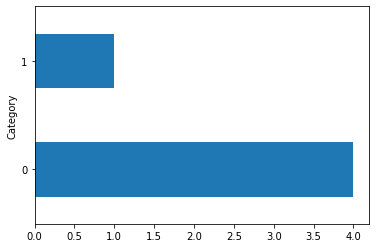

In [ ]:
newDF.groupby(['Category']).size().plot(kind='barh')
newDF

Text Summ

In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
vectorizer = TfidfVectorizer(stop_words="english", use_idf=True, ngram_range=(1,1))

vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time.time()
df = df.dropna()
tfidf = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import NMF
n_topics = 20
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['trump', 'say', 'state', 'presid', 'investig'],
 1: ['mcconnel', 'trump', 'ban', 'court', 'realdonaldtrump'],
 2: ['mcconnel', 'ban', 'countri', 'peopl', 'court'],
 3: ['pope', 'coronaviru', 'test', 'vatican', 'posit'],
 4: ['attorney', 'manafort', 'probe', 'manhattan', 'investig'],
 5: ['facebook', 'april', 'post', 'coronaviru', 'dutert'],
 6: ['report', 'peopl', 'claim', 'new', 'campaign'],
 7: ['fee', 'fals', 'check', 'man', 'post'],
 8: ['comey', 'nation', 'loyalti', 'world', 'director'],
 9: ['legal', 'appointeeth', 'best', 'pour', 'mike'],
 10: ['question', 'video', 'mostli', 'cancel', 'viru'],
 11: ['apostol', 'dismiss', 'specul', 'matteo', 'year'],
 12: ['attorney', 'manafort', 'probe', 'investig', 'latest'],
 13: ['follow', 'countri', 'messag', 'hope', 'say'],
 14: ['trump', 'russia', 'unit', 'person', 'danger'],
 15: ['trump', 'donald', 'mcconnel', 'make', 'ban'],
 16: ['mcconnel', 'ban', 'court', 'februari', 'realdonaldtrump'],
 17: ['diagnos', 'dismiss', 'lose', 'catho

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

In [ ]:
t = pipe.transform(df['text']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0, n_topics)])
t.head()

,"['trump', 'say', 'state', 'presid', 'investig']","['mcconnel', 'trump', 'ban', 'court', 'realdonaldtrump']","['mcconnel', 'ban', 'countri', 'peopl', 'court']","['pope', 'coronaviru', 'test', 'vatican', 'posit']","['attorney', 'manafort', 'probe', 'manhattan', 'investig']","['facebook', 'april', 'post', 'coronaviru', 'dutert']","['report', 'peopl', 'claim', 'new', 'campaign']","['fee', 'fals', 'check', 'man', 'post']","['comey', 'nation', 'loyalti', 'world', 'director']","['legal', 'appointeeth', 'best', 'pour', 'mike']","['question', 'video', 'mostli', 'cancel', 'viru']","['apostol', 'dismiss', 'specul', 'matteo', 'year']","['attorney', 'manafort', 'probe', 'investig', 'latest']","['follow', 'countri', 'messag', 'hope', 'say']","['trump', 'russia', 'unit', 'person', 'danger']","['trump', 'donald', 'mcconnel', 'make', 'ban']","['mcconnel', 'ban', 'court', 'februari', 'realdonaldtrump']","['diagnos', 'dismiss', 'lose', 'cathol', 'deni']","['fals', 'polic', 'joe', 'restrict', 'succeed']","['danger', 'make', 'open', 'law', 'noth']"
0,0.000000,0.000000,1.724217e-07,0.000000,0.000000,0.147679,0.000008,0.344598,0.000000,0.000000,0.000000,0.000000,0.000000,0.214863,0.000000,0.000000,0.000000e+00,0.000000,7.018560e-02,0.000000
1,0.000000,0.000000,0.000000e+00,0.132568,0.000000,0.000000,0.000000,1.150645,0.000000,0.000000,0.148709,0.068294,0.000000,0.000000,0.000000,0.000000,2.985894e-10,0.298187,3.285317e-07,0.000000
2,0.058156,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.045023,0.000000,0.014544,0.000000,0.000000,0.000000,0.000000,0.000000,0.109996,0.000000,0.000000e+00,0.000069,4.622572e-06,0.025907
3,0.081673,0.352693,9.313143e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169841,0.000881,0.000000,0.000000,0.001734,0.011628,0.037369,5.600450e-02,0.000000,0.000000e+00,0.000000
4,0.045583,0.000000,0.000000e+00,0.000000,0.106527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061794,0.000000,0.073832,0.000000,9.492068e-09,0.000095,2.947072e-06,0.000000


In [ ]:
t

,"['trump', 'say', 'state', 'presid', 'investig']","['mcconnel', 'trump', 'ban', 'court', 'realdonaldtrump']","['mcconnel', 'ban', 'countri', 'peopl', 'court']","['pope', 'coronaviru', 'test', 'vatican', 'posit']","['attorney', 'manafort', 'probe', 'manhattan', 'investig']","['facebook', 'april', 'post', 'coronaviru', 'dutert']","['report', 'peopl', 'claim', 'new', 'campaign']","['fee', 'fals', 'check', 'man', 'post']","['comey', 'nation', 'loyalti', 'world', 'director']","['legal', 'appointeeth', 'best', 'pour', 'mike']","['question', 'video', 'mostli', 'cancel', 'viru']","['apostol', 'dismiss', 'specul', 'matteo', 'year']","['attorney', 'manafort', 'probe', 'investig', 'latest']","['follow', 'countri', 'messag', 'hope', 'say']","['trump', 'russia', 'unit', 'person', 'danger']","['trump', 'donald', 'mcconnel', 'make', 'ban']","['mcconnel', 'ban', 'court', 'februari', 'realdonaldtrump']","['diagnos', 'dismiss', 'lose', 'cathol', 'deni']","['fals', 'polic', 'joe', 'restrict', 'succeed']","['danger', 'make', 'open', 'law', 'noth']"
0,0.000000,0.000000,1.724217e-07,0.000000,0.000000,0.147679,0.000008,0.344598,0.000000,0.000000,0.000000,0.000000,0.000000,0.214863,0.000000,0.000000,0.000000e+00,0.000000,7.018560e-02,0.000000
1,0.000000,0.000000,0.000000e+00,0.132568,0.000000,0.000000,0.000000,1.150645,0.000000,0.000000,0.148709,0.068294,0.000000,0.000000,0.000000,0.000000,2.985894e-10,0.298187,3.285317e-07,0.000000
2,0.058156,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.045023,0.000000,0.014544,0.000000,0.000000,0.000000,0.000000,0.000000,0.109996,0.000000,0.000000e+00,0.000069,4.622572e-06,0.025907
3,0.081673,0.352693,9.313143e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169841,0.000881,0.000000,0.000000,0.001734,0.011628,0.037369,5.600450e-02,0.000000,0.000000e+00,0.000000
4,0.045583,0.000000,0.000000e+00,0.000000,0.106527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061794,0.000000,0.073832,0.000000,9.492068e-09,0.000095,2.947072e-06,0.000000


In [ ]:
merged=pd.concat([t, newDF], axis=1)

In [ ]:
merged

,"['attorney', 'manafort', 'probe', 'manhattan', 'york']","['philippin', 'dutert', 'queen', 'elizabeth', 'worst']","['pope', 'vatican', 'cancel', 'ill', 'franci']","['comey', 'nation', 'care', 'loyalti', 'world']","['queen', 'dutert', 'philippin', 'pandem', 'quot']","['attorney', 'manafort', 'probe', 'manhattan', 'earlier']","['mcconnel', 'ban', 'court', 'muslim', 'februari']","['comey', 'nation', 'director', 'care', 'restraint']","['pope', 'vatican', 'viru', 'aid', 'cancel']","['comey', 'nation', 'director', 'world', 'loyalti']","['philippin', 'elizabeth', 'continu', 'stay', 'offer']","['mcconnel', 'ban', 'court', 'judg', 'putin']","['pope', 'vatican', 'appear', 'franci', 'aid']","['collus', 'manhattan', 'meddl', 'attorney', 'financi']","['best', 'impeach', 'subject', 'leave', 'terrorist']","['attorney', 'manafort', 'probe', 'manhattan', 'york']","['gener', 'seek', 'dozen', 'immedi', 'politico']","['pope', 'spokesman', 'ash', 'young', 'cancel']","['attorney', 'manhattan', 'knowledg', 'bureau', 'cooper']","['necessari', 'subject', 'fraud', 'coupl', 'terrorist']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.000000,1.220783e-01,0.000000,0.000000e+00,0.054687,0.000000,0.000000,0.000000,0.000000,0.00000,0.120061,0.000000,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0.0144928,0,0,0,0.00724638,0,0,0,0,0.00724638,0,0.0217391,0,0,0,0,0.00724638,0.0289855,0.00724638,0.00724638,...,0.00724638,0,0.00724638,0,0.0289855,0,0,0,0,0,0,0,0,0.00724638,0.00724638,0,0,0.0144928,0.0362319,0,0,0.00724638,0.00724638,0.00724638,0.00724638,0.00724638,0,0,0,0.0217391,0.00724638,0,0,0.0144928,0,0.0144928,0,0.0144928,0,0
1,0.000000,3.189651e-20,0.120456,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.088952,0.00000,0.000000,0.000000,0.005466,0.00000,0.0,0.000000,0.000000e+00,0.000131,0.00000,0.0,0.0133333,0,0,0,0.0133333,0,0,0,0,0,0,0,0.00666667,0,0,0,0,0.00666667,0,0.00666667,...,0.00666667,0,0,0.0133333,0.00666667,0,0,0.02,0,0,0,0,0,0,0,0,0,0.0133333,0.00666667,0,0.0133333,0,0,0,0.00666667,0,0,0,0,0.00666667,0.00666667,0,0,0.00666667,0,0.0133333,0,0,0.0133333,0
2,0.000000,0.000000e+00,0.000000,1.842014e-01,0.000000,0.000000,0.000000,0.103678,0.000000,0.21214,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0.0060241,0.0120482,0,0.0120482,0,0,0.0060241,0,0,0,0,0,0,0,0,0,0,0.0240964,0,0,...,0,0,0.0060241,0,0.0361446,0.0180723,0,0,0.0180723,0,0,0,0,0,0,0,0,0.0060241,0.0120482,0,0.0060241,0,0.0180723,0,0.0060241,0.0060241,0,0,0,0.0060241,0.0120482,0.0060241,0,0.0180723,0,0,0,0.0180723,0,0
3,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.159364,0.000000,0.000000,0.00000,0.000000,0.067648,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0,0.00381679,0.00381679,0,0,0,0,0,0,0.00763359,0,0.00381679,0,0,0,0.00763359,0,0.0152672,0.00381679,0,...,0.00763359,0.00381679,0,0,0.00763359,0.00381679,0,0,0.00381679,0,0,0,0.00381679,0.00763359,0,0,0,0,0.0152672,0,0.019084,0.00763359,0.0229008,0.00763359,0,0,0.00381679,0.00381679,0,0.00763359,0,0.00381679,0,0.00763359,0,0.00381679,0,0.00381679,0.00763359,0
4,0.150178,0.000000e+00,0.000000,6.862716e-38,0.000000,0.162453,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.09867,0.0,0.097606,3.083472e+11,0.000000,0.00025,0.0,0.00687285,0.00343643,0,0.00343643,0,0,0,0,0,0,0,0.00343643,0.0412371,0,0,0,0,0.024055,0,0,...,0.00343643,0,0.00687285,0,0.00343643,0.0343643,0.00343643,0.0103093,0,0,0,0,0.00343643,0,0,0,0,0,0,0.00343643,0.00343643

In [ ]:
import time
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)

In [ ]:
merged

,"['attorney', 'manafort', 'probe', 'manhattan', 'york']","['philippin', 'dutert', 'queen', 'elizabeth', 'worst']","['pope', 'vatican', 'cancel', 'ill', 'franci']","['comey', 'nation', 'care', 'loyalti', 'world']","['queen', 'dutert', 'philippin', 'pandem', 'quot']","['attorney', 'manafort', 'probe', 'manhattan', 'earlier']","['mcconnel', 'ban', 'court', 'muslim', 'februari']","['comey', 'nation', 'director', 'care', 'restraint']","['pope', 'vatican', 'viru', 'aid', 'cancel']","['comey', 'nation', 'director', 'world', 'loyalti']","['philippin', 'elizabeth', 'continu', 'stay', 'offer']","['mcconnel', 'ban', 'court', 'judg', 'putin']","['pope', 'vatican', 'appear', 'franci', 'aid']","['collus', 'manhattan', 'meddl', 'attorney', 'financi']","['best', 'impeach', 'subject', 'leave', 'terrorist']","['attorney', 'manafort', 'probe', 'manhattan', 'york']","['gener', 'seek', 'dozen', 'immedi', 'politico']","['pope', 'spokesman', 'ash', 'young', 'cancel']","['attorney', 'manhattan', 'knowledg', 'bureau', 'cooper']","['necessari', 'subject', 'fraud', 'coupl', 'terrorist']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.000000,1.220783e-01,0.000000,0.000000e+00,0.054687,0.000000,0.000000,0.000000,0.000000,0.00000,0.120061,0.000000,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0.0144928,0,0,0,0.00724638,0,0,0,0,0.00724638,0,0.0217391,0,0,0,0,0.00724638,0.0289855,0.00724638,0.00724638,...,0.00724638,0,0.00724638,0,0.0289855,0,0,0,0,0,0,0,0,0.00724638,0.00724638,0,0,0.0144928,0.0362319,0,0,0.00724638,0.00724638,0.00724638,0.00724638,0.00724638,0,0,0,0.0217391,0.00724638,0,0,0.0144928,0,0.0144928,0,0.0144928,0,0
1,0.000000,3.189651e-20,0.120456,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.088952,0.00000,0.000000,0.000000,0.005466,0.00000,0.0,0.000000,0.000000e+00,0.000131,0.00000,0.0,0.0133333,0,0,0,0.0133333,0,0,0,0,0,0,0,0.00666667,0,0,0,0,0.00666667,0,0.00666667,...,0.00666667,0,0,0.0133333,0.00666667,0,0,0.02,0,0,0,0,0,0,0,0,0,0.0133333,0.00666667,0,0.0133333,0,0,0,0.00666667,0,0,0,0,0.00666667,0.00666667,0,0,0.00666667,0,0.0133333,0,0,0.0133333,0
2,0.000000,0.000000e+00,0.000000,1.842014e-01,0.000000,0.000000,0.000000,0.103678,0.000000,0.21214,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0.0060241,0.0120482,0,0.0120482,0,0,0.0060241,0,0,0,0,0,0,0,0,0,0,0.0240964,0,0,...,0,0,0.0060241,0,0.0361446,0.0180723,0,0,0.0180723,0,0,0,0,0,0,0,0,0.0060241,0.0120482,0,0.0060241,0,0.0180723,0,0.0060241,0.0060241,0,0,0,0.0060241,0.0120482,0.0060241,0,0.0180723,0,0,0,0.0180723,0,0
3,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.159364,0.000000,0.000000,0.00000,0.000000,0.067648,0.000000,0.00000,0.0,0.000000,0.000000e+00,0.000000,0.00000,0.0,0,0.00381679,0.00381679,0,0,0,0,0,0,0.00763359,0,0.00381679,0,0,0,0.00763359,0,0.0152672,0.00381679,0,...,0.00763359,0.00381679,0,0,0.00763359,0.00381679,0,0,0.00381679,0,0,0,0.00381679,0.00763359,0,0,0,0,0.0152672,0,0.019084,0.00763359,0.0229008,0.00763359,0,0,0.00381679,0.00381679,0,0.00763359,0,0.00381679,0,0.00763359,0,0.00381679,0,0.00381679,0.00763359,0
4,0.150178,0.000000e+00,0.000000,6.862716e-38,0.000000,0.162453,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.09867,0.0,0.097606,3.083472e+11,0.000000,0.00025,0.0,0.00687285,0.00343643,0,0.00343643,0,0,0,0,0,0,0,0.00343643,0.0412371,0,0,0,0,0.024055,0,0,...,0.00343643,0,0.00687285,0,0.00343643,0.0343643,0.00343643,0.0103093,0,0,0,0,0.00343643,0,0,0,0,0,0,0.00343643,0.00343643

In [ ]:
## for merged
merged = merged.dropna()
columns1= merged.columns[:-1]

x=merged[columns1]
y=merged['Category']
print(x)
print(y)

   ['attorney', 'manafort', 'probe', 'manhattan', 'york']  ...     musical
0                                           0.000000       ...           0
1                                           0.000000       ...   0.0133333
2                                           0.000000       ...           0
3                                           0.000000       ...  0.00763359
4                                           0.150178       ...           0

[5 rows x 216 columns]
0    0
1    0
2    0
3    0
4    1
Name: Category, dtype: int64


In [ ]:
## empath Only
newDF = newDF.dropna()
columns=newDF.columns[:-1]

x=newDF[columns]
y=newDF['Category']
print(x)
print(y)

0        help      office       dance  ... rural positive_emotion     musical
0   0.0144928           0           0  ...     0        0.0144928           0
1   0.0133333           0           0  ...     0                0   0.0133333
2   0.0060241   0.0120482           0  ...     0        0.0180723           0
3           0  0.00381679  0.00381679  ...     0       0.00381679  0.00763359
4  0.00687285  0.00343643           0  ...     0                0           0

[5 rows x 194 columns]
0    0
1    0
2    0
3    0
4    1
Name: Category, dtype: int64


In [ ]:
## only ts
x1=t
# y=newDF['Category']
print(x1)
# print(y)

   ['trump', 'say', 'state', 'presid', 'investig']  ...  ['danger', 'make', 'open', 'law', 'noth']
0                                         0.000000  ...                                   0.000000
1                                         0.000000  ...                                   0.000000
2                                         0.058156  ...                                   0.025907
3                                         0.081673  ...                                   0.000000
4                                         0.045583  ...                                   0.000000

[5 rows x 20 columns]


In [ ]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
# models.append(lr)
# models.append(dt)
# models.append(naive)
models.append(lda)
# models.append(clf)
# models.append(knn2)
# models.append(knn3)
# models.append(knn4)
models.append(regressor)
models.append(gbc)

# models.append(bagging)
# models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.70,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) Overall accuracy: [0.88813595 0.88813595]
Execution Time: 1.2375783920288086
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Overall accuracy: [0.89835279 0.89835279]
Execution Time: 4.822704792022705
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_de

In [ ]:
F1Score is : [0.83, 0.87, 0.87]
Accuracy is: [array([0.83402836, 0.83402836]), array([0.86999583, 0.86999583]), array([0.87322769, 0.87322769])] ## empath
F1Score is : [0.87, 0.88, 0.88]
Accuracy is: [array([0.86551293, 0.86551293]), array([0.88427857, 0.88427857]), array([0.87510425, 0.87510425])] ## ts
F1Score is : [0.89, 0.9, 0.91]
Accuracy is: [array([0.88813595, 0.88813595]), array([0.89887406, 0.89887406]), array([0.90565054, 0.90565054])] #3 empath + ts

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/pickles.zip", 'r')
zip_ref.extractall("./")
from sklearn.externals import joblib 

regE = joblib.load('regressorEmpath.pkl')  
regTS = joblib.load('regressorTS20.pkl')
regHy = joblib.load('regressorHybrid.pkl')
gbcE = joblib.load('gbcEmpath.pkl')  
gbcTS = joblib.load('gbcTS20.pkl')
gbcHy = joblib.load('gbcHybrid.pkl')

# regE.predict(x1)
regTS.predict(x1)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


array([1, 1, 0, 0, 0])

In [13]:
df.at[1, 'text']

'pope francis recently canceled some engagements after he was seen coughing and sneezing during an ash wednesday mass in rome the rare cancellations came as the coronavirus outbreak in italy has infected more than people mostly in the northern region and has people questioning whether the pope himself has contracted the virus one youtube video takes the rumor further by stating that the vatican confirmed pope francis and two aides tested positive for the coronavirus this isn true there has been no official confirmation that the year old catholic leader or any of his aides tested positive for the virus the video was flagged as part of facebook efforts to combat false news and misinformation on its news feed read more about our partnership with facebook featured fact check bloggers stated on april in blog post joe exotic tests positive for coronavirus in prison it been confirmed by ciara rourke april we could find no credible sources that say the pope who lost part of lung to an illness 

In [ ]:
regE.predict(x)

array([0, 0, 0, 0, 1])